# Импорт зависимостей

In [384]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

# Импорт тренировочных данных

In [420]:
train_df = pd.read_csv (r'train.csv')

In [421]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [422]:
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


# Категориальные переменные

In [423]:
train_df["Ecology_2"].unique()

array(['B', 'A'], dtype=object)

In [424]:
train_df["Ecology_2"].replace({"A": 1, "B": 0}, inplace=True)

In [425]:
train_df["Ecology_3"].unique()

array(['B', 'A'], dtype=object)

In [426]:
train_df["Ecology_3"].replace({"A": 1, "B": 0}, inplace=True)

In [427]:
train_df["Shops_2"].unique()

array(['B', 'A'], dtype=object)

In [428]:
train_df["Shops_2"].replace({"A": 1, "B": 0}, inplace=True)

In [429]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  int64  
 11  Ecology_3      10000 non-null  int64  
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

# Визуализация целевой переменной

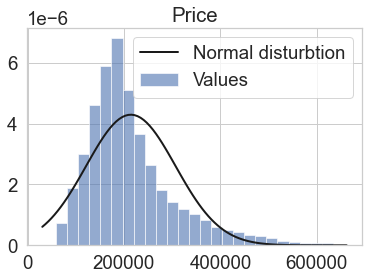

In [430]:
plt.hist(train_df["Price"], bins=25, density=True, alpha=0.6, color='b') #гистограмма распределения
mu, std = norm.fit(train_df["Price"]) #график нормального распределения
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)  
plt.plot(x, p, 'k', linewidth=2)
plt.title("Price") 
plt.legend(["Normal disturbtion", "Values"])

# Корреляция целевой переменной

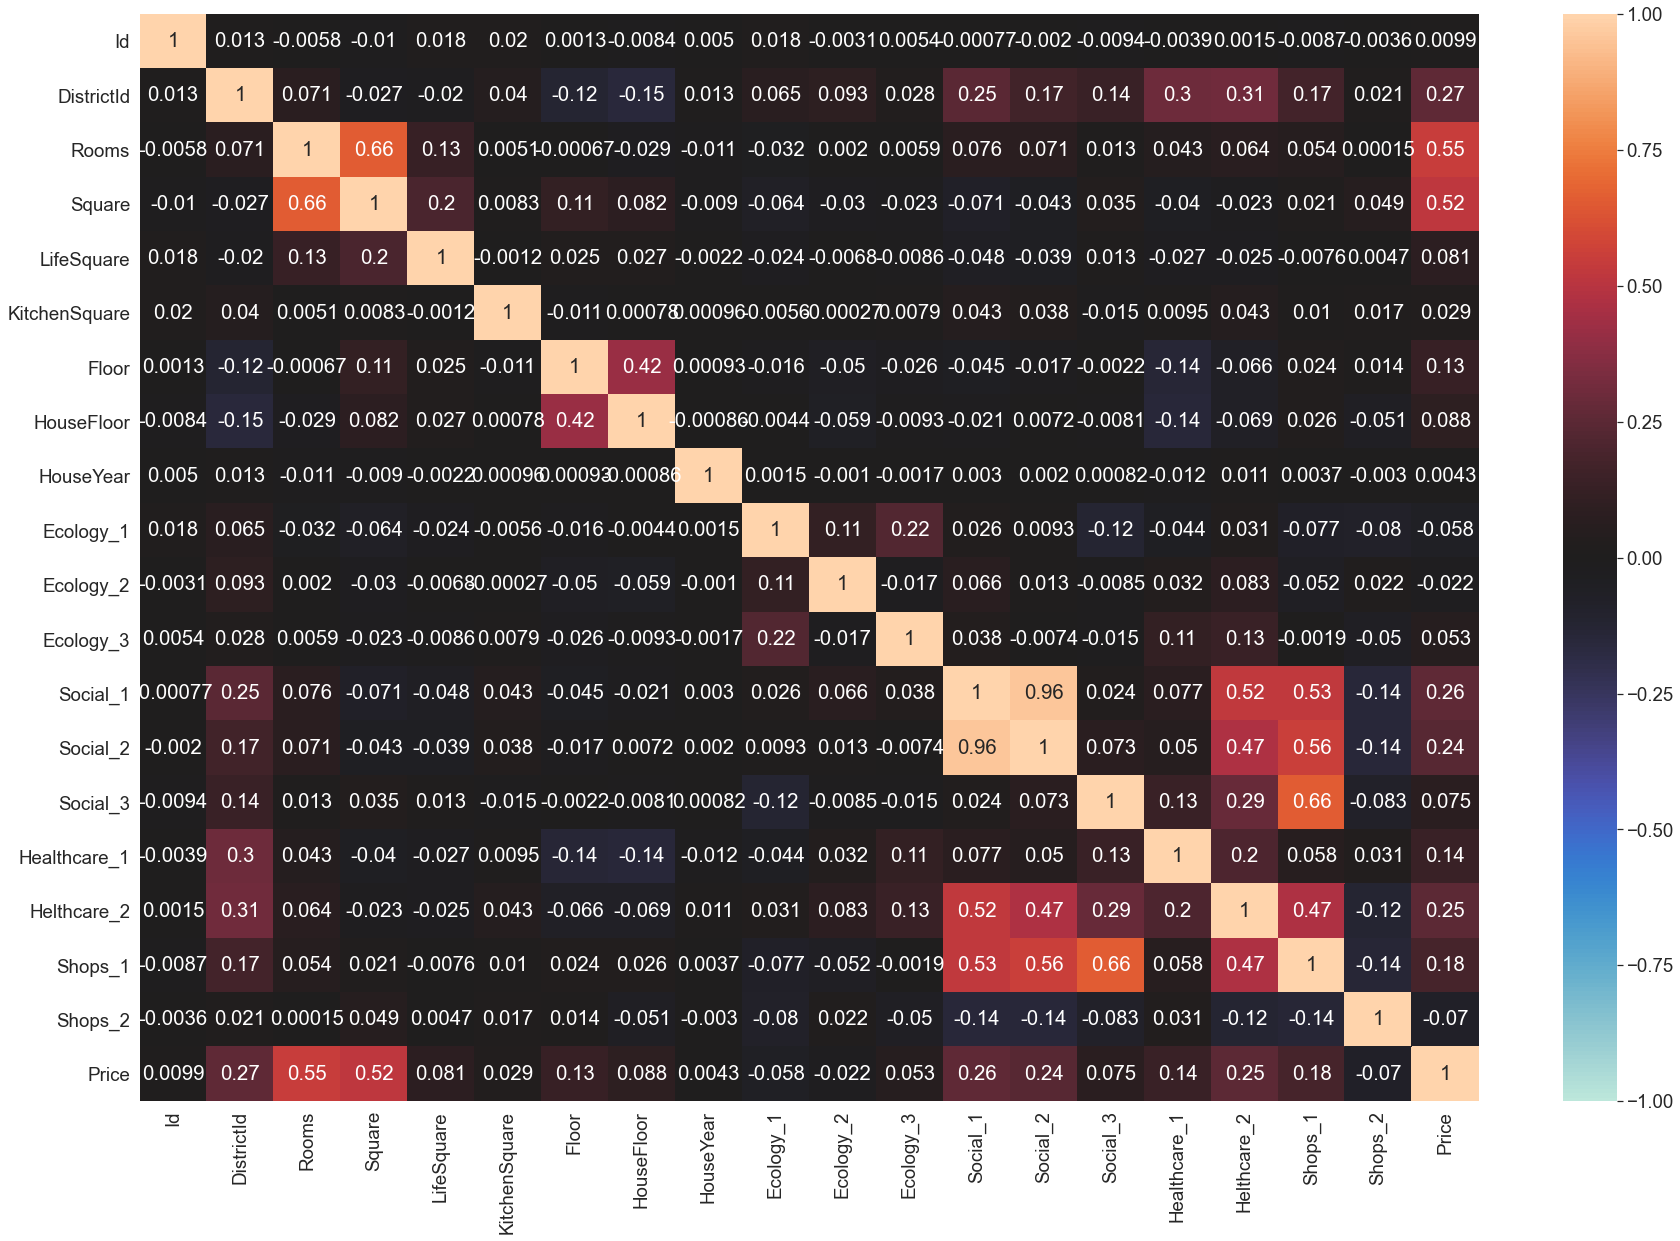

In [468]:
plt.figure(figsize = (30,20))
sns.heatmap(train_df.corr(), annot = True, vmin = -1, vmax = 1, center =0)

In [432]:
train_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,0.009700,0.027500,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,0.082500,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,0.098015,0.163543,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,0.275139,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,0.000000,0.000000,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,0.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,0.000000,0.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,0.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,0.000000,0.000000,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,0.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570


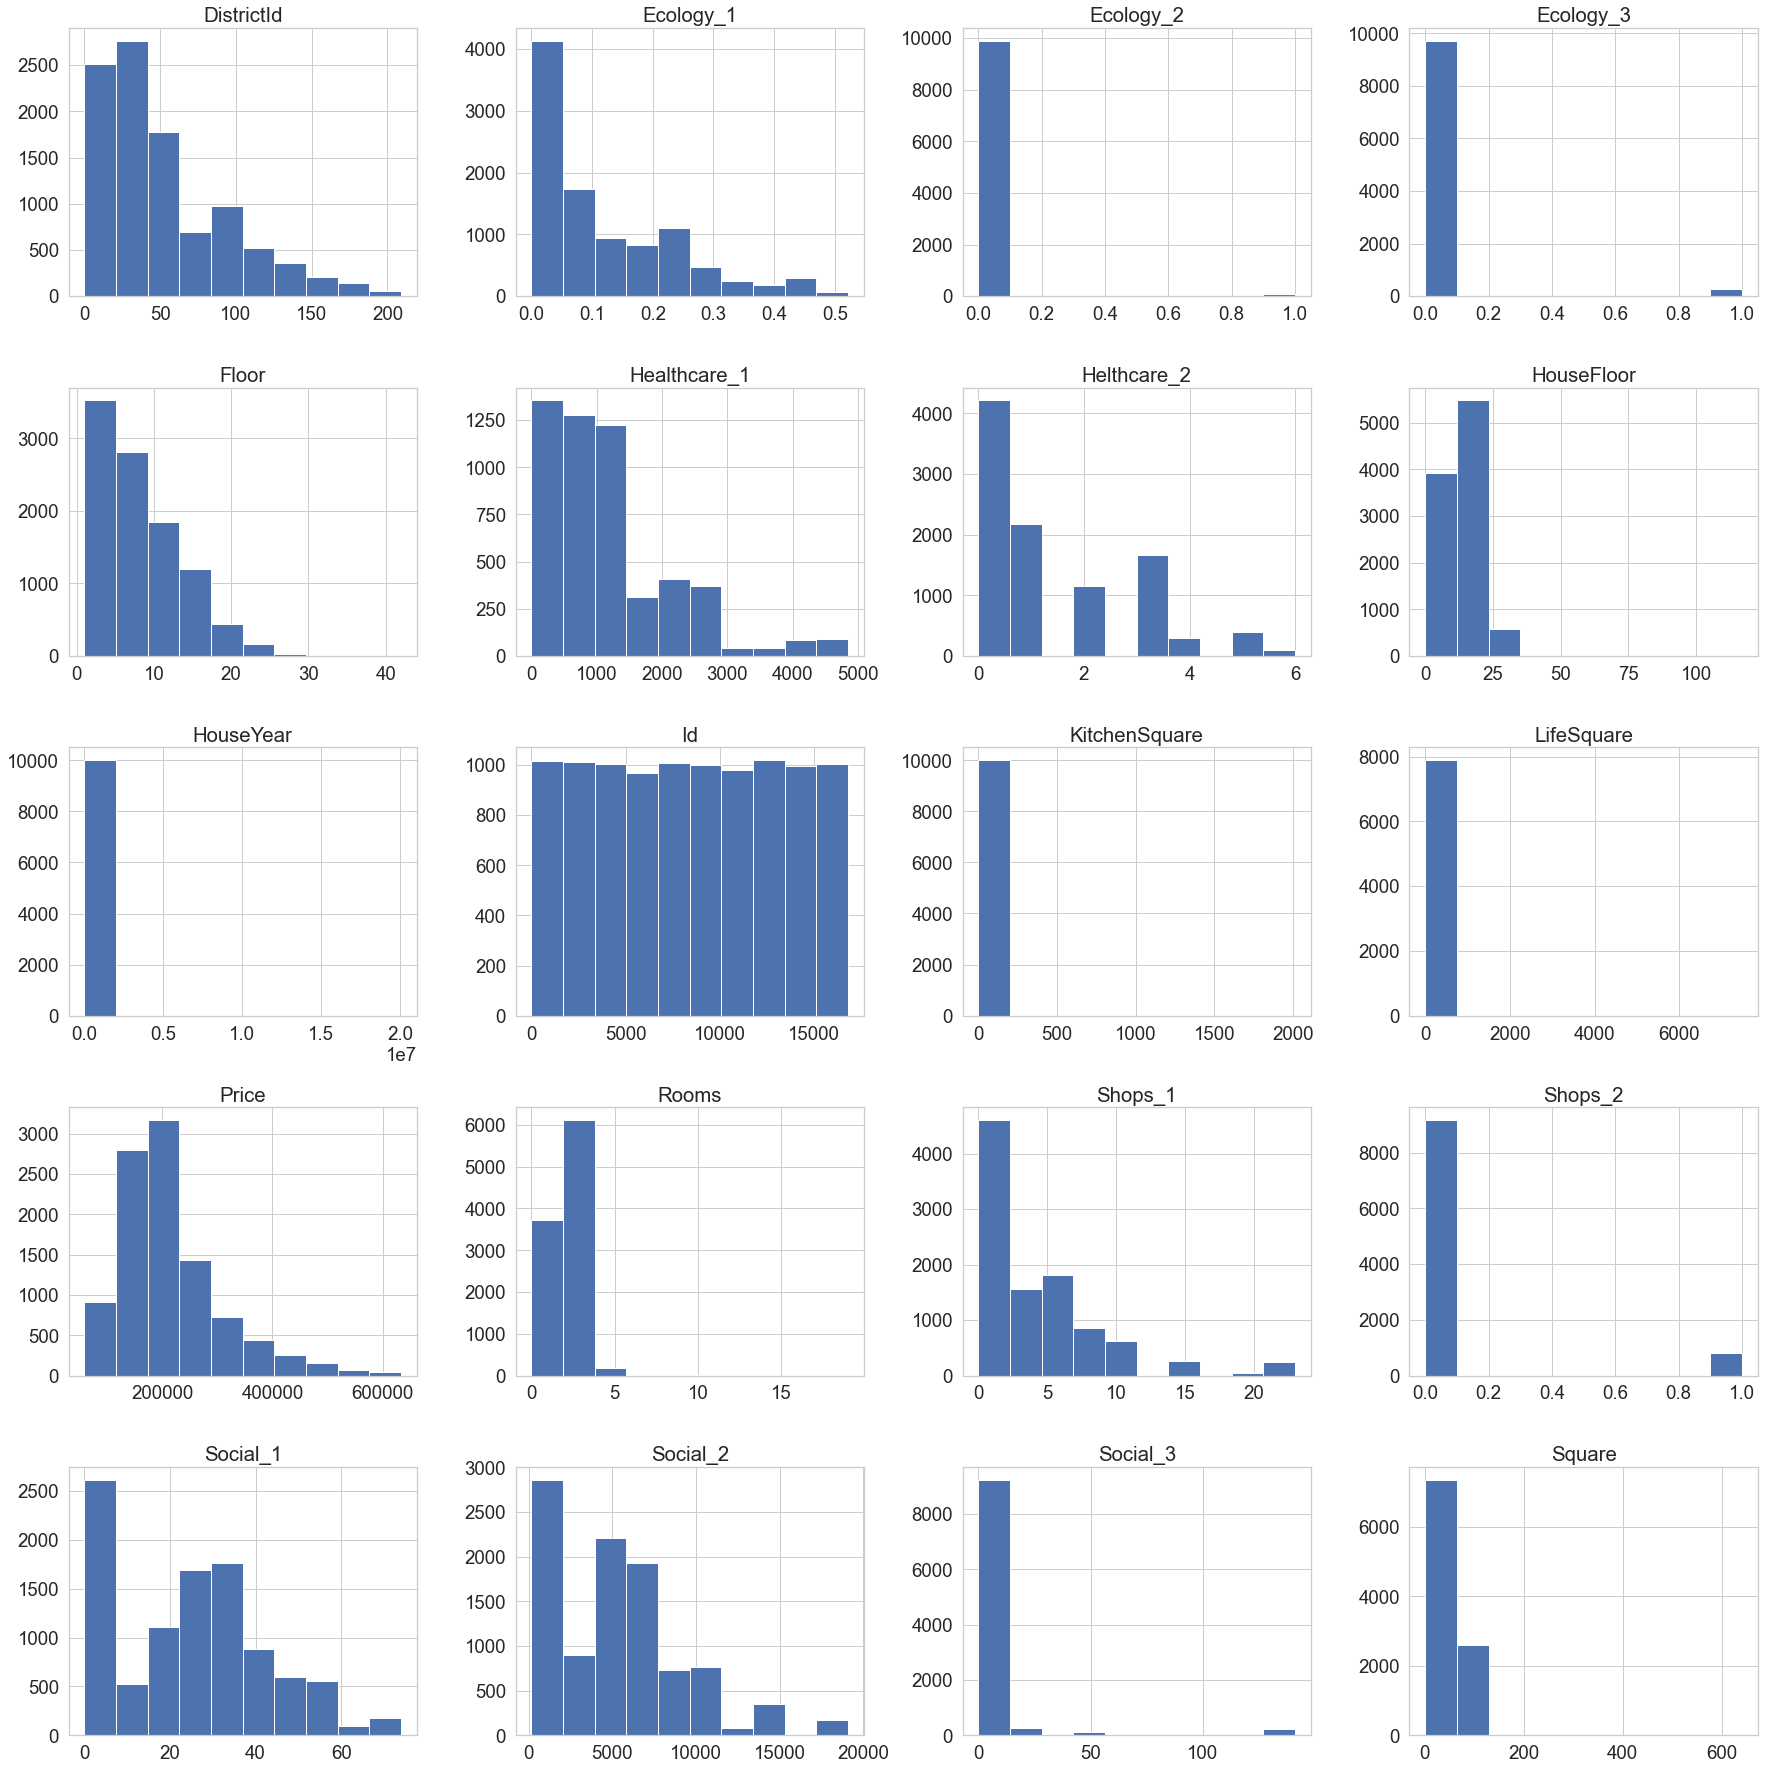

In [433]:
train_df.hist(figsize = (25,25))
plt.tight_layout()
plt.show()

# Работа с пропущенными значениями

In [434]:
train_df.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

### Разница в целевом признаке для указанных и неуказанных значений около 20%

In [435]:
train_df.groupby(train_df['LifeSquare'].isnull()).mean()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
LifeSquare,,,,,,,,,,,,,,,,,,,,
False,8417.370990,56.670217,1.920375,55.234260,37.199645,7.583238,8.155192,12.438063,4528.250919,0.122521,0.011538,0.034868,28.480284,6097.788006,7.272981,1211.382769,1.521491,4.531254,0.069481,223409.768022
True,8256.636062,26.999527,1.778987,60.352646,NaN,1.383814,9.913393,13.248935,1981.707525,0.105183,0.002840,0.000000,10.528159,2569.010885,10.899195,733.229530,0.565547,3.111690,0.131093,179534.185327


In [436]:
train_df.groupby(train_df['Healthcare_1'].isnull()).mean()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Healthcare_1,,,,,,,,,,,,,,,,,,,,
False,8380.733372,58.164360,1.922914,55.694241,35.269683,6.657824,8.212226,12.405229,5837.143406,0.145402,0.018647,0.052864,28.277201,5918.926759,13.179354,1142.90446,1.900038,5.081892,0.029604,227332.759591
True,8386.307211,41.983535,1.855356,56.989643,39.707470,5.856398,8.867653,12.830763,1987.670488,0.090077,0.000000,0.000000,20.794498,4737.665069,2.466236,NaN,0.690079,3.309087,0.139850,199834.005543


# Импутация данных методом MICE

In [437]:
imputer = IterativeImputer(imputation_order='ascending',max_iter=10,random_state=42,n_nearest_features=None)

In [438]:
imputed_data = imputer.fit_transform(train_df)

In [439]:
column_names = list(train_df.columns.values)

In [440]:
imputed_df = pd.DataFrame(imputed_data, columns = column_names)

In [441]:
imputed_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  float64
 1   DistrictId     10000 non-null  float64
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     10000 non-null  float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  float64
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  float64
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  float64
 11  Ecology_3      10000 non-null  float64
 12  Social_1       10000 non-null  float64
 13  Social_2       10000 non-null  float64
 14  Social_3       10000 non-null  float64
 15  Healthcare_1   10000 non-null  float64
 16  Helthcare_2    10000 non-null  float64
 17  Shops_1        10000 non-null  float64
 18  Shops_2

In [442]:
imputed_dataset.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,39.027398,6.273300,8.526700,12.609400,3.990166e+03,0.118858,0.009700,0.027500,24.687000,5352.157400,8.039200,1009.508308,1.319500,4.231300,0.082500,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,77.141074,28.560917,5.241148,6.775974,2.005003e+05,0.119025,0.098015,0.163543,17.532614,4006.799803,23.831875,783.282760,1.493601,4.806341,0.275139,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,24.912099,1.000000,4.000000,9.000000,1.974000e+03,0.017647,0.000000,0.000000,6.000000,1564.000000,0.000000,540.000000,0.000000,1.000000,0.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,34.368835,6.000000,7.000000,13.000000,1.977000e+03,0.075424,0.000000,0.000000,25.000000,5285.000000,2.000000,832.671442,1.000000,3.000000,0.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,47.170889,9.000000,12.000000,17.000000,2.001000e+03,0.195781,0.000000,0.000000,36.000000,7227.000000,5.000000,1183.000000,2.000000,6.000000,0.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,5004.372575,6.000000,23.000000,1.000000,633233.466570


# Выбросы

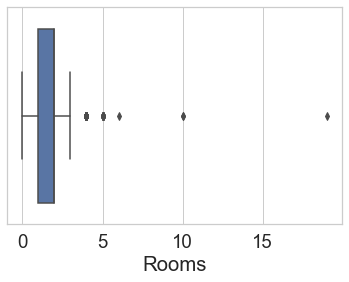

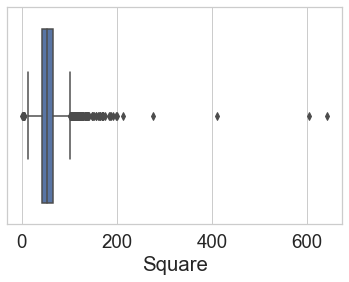

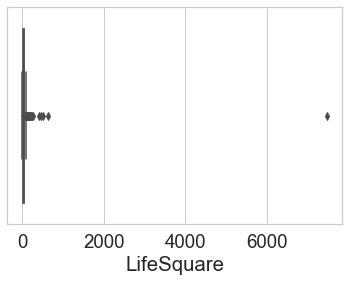

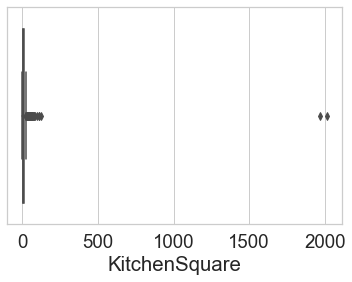

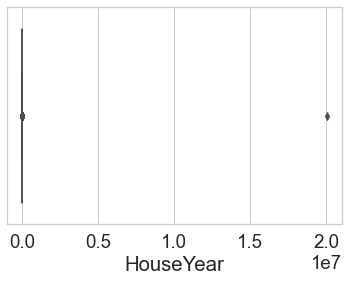

In [443]:
outlier_features = ["Rooms", "Square", "LifeSquare", "KitchenSquare", "HouseYear"]
for i in outlier_features:
    sns.boxplot(imputed_dataset[i])
    plt.show()

In [444]:
def outlier_remove(col, df): # функция фильтрации выбросов в пределах 1,5 интерквартильных размахов
    Q3 = np.quantile(df[col], 0.75)
    Q1 = np.quantile(df[col], 0.25)
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in df[col] if ((x > lower_range) & (x < upper_range))]
    return df.loc[df[col].isin(outlier_free_list)]

In [445]:
filtered_df = imputed_df
for col in outlier_features:
    filtered_df[col] = outlier_remove(col, imputed_df)[col]

In [446]:
filtered_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,10000.00000,10000.000000,9828.000000,9758.000000,9745.000000,9952.000000,10000.000000,10000.000000,9962.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.848799,54.707889,36.532064,5.674136,8.526700,12.609400,1985.083317,0.118858,0.009700,0.027500,24.687000,5352.157400,8.039200,1009.508308,1.319500,4.231300,0.082500,214138.857399
std,4859.01902,43.587592,0.764755,16.051431,14.754541,3.883908,5.241148,6.775974,18.077755,0.119025,0.098015,0.163543,17.532614,4006.799803,23.831875,783.282760,1.493601,4.806341,0.275139,92872.293865
min,0.00000,0.000000,0.000000,13.784865,0.370619,0.000000,1.000000,0.000000,1934.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.645594,24.467559,1.000000,4.000000,9.000000,1974.000000,0.017647,0.000000,0.000000,6.000000,1564.000000,0.000000,540.000000,0.000000,1.000000,0.000000,153872.633942
50%,8394.50000,36.000000,2.000000,51.877254,33.948217,6.000000,7.000000,13.000000,1977.000000,0.075424,0.000000,0.000000,25.000000,5285.000000,2.000000,832.671442,1.000000,3.000000,0.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.018258,46.348526,9.000000,12.000000,17.000000,2001.000000,0.195781,0.000000,0.000000,36.000000,7227.000000,5.000000,1183.000000,2.000000,6.000000,0.000000,249135.462171
max,16798.00000,209.000000,3.000000,102.056968,80.506284,20.000000,42.000000,117.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,5004.372575,6.000000,23.000000,1.000000,633233.466570


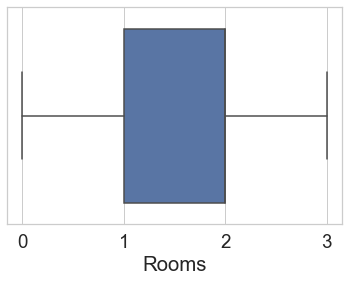

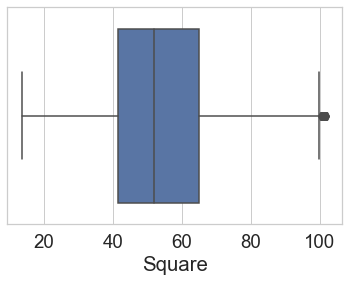

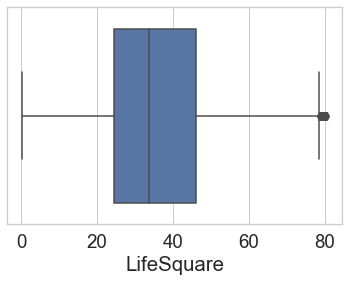

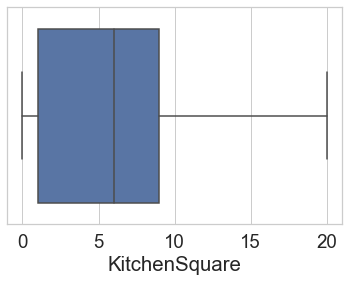

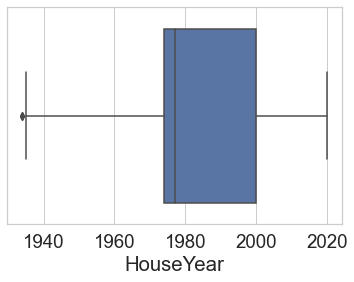

In [447]:
outlier_features = ["Rooms", "Square", "LifeSquare", "KitchenSquare", "HouseYear"]
for i in outlier_features:
    sns.boxplot(imputed_filtered_dataset[i])
    plt.show()

In [448]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  float64
 1   DistrictId     10000 non-null  float64
 2   Rooms          9828 non-null   float64
 3   Square         9758 non-null   float64
 4   LifeSquare     9745 non-null   float64
 5   KitchenSquare  9952 non-null   float64
 6   Floor          10000 non-null  float64
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      9962 non-null   float64
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  float64
 11  Ecology_3      10000 non-null  float64
 12  Social_1       10000 non-null  float64
 13  Social_2       10000 non-null  float64
 14  Social_3       10000 non-null  float64
 15  Healthcare_1   10000 non-null  float64
 16  Helthcare_2    10000 non-null  float64
 17  Shops_1        10000 non-null  float64
 18  Shops_2

In [449]:
imputed_filtered_dataset = filtered_df.dropna()
imputed_filtered_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9464 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             9464 non-null   float64
 1   DistrictId     9464 non-null   float64
 2   Rooms          9464 non-null   float64
 3   Square         9464 non-null   float64
 4   LifeSquare     9464 non-null   float64
 5   KitchenSquare  9464 non-null   float64
 6   Floor          9464 non-null   float64
 7   HouseFloor     9464 non-null   float64
 8   HouseYear      9464 non-null   float64
 9   Ecology_1      9464 non-null   float64
 10  Ecology_2      9464 non-null   float64
 11  Ecology_3      9464 non-null   float64
 12  Social_1       9464 non-null   float64
 13  Social_2       9464 non-null   float64
 14  Social_3       9464 non-null   float64
 15  Healthcare_1   9464 non-null   float64
 16  Helthcare_2    9464 non-null   float64
 17  Shops_1        9464 non-null   float64
 18  Shops_2 

# Построение модели

In [450]:
X = imputed_filtered_dataset.loc[:, imputed_filtered_dataset.columns!="Price"]
y = imputed_filtered_dataset[["Price"]]

### Использование GridSearchCV для подбора гиперпараметров модели

In [451]:
parameters = [{'n_estimators': [10, 50, 100], 'max_features': np.arange(3, 6), 'max_depth': np.arange(4, 12)}]

In [452]:
model = GridSearchCV(estimator=RandomForestRegressor(random_state=100), param_grid=parameters, scoring='r2', cv=5)

In [453]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [454]:
model.fit(X_train, y_train.loc[:, "Price"])

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=100,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [455]:
model.best_params_

{'max_depth': 11, 'max_features': 5, 'n_estimators': 100}

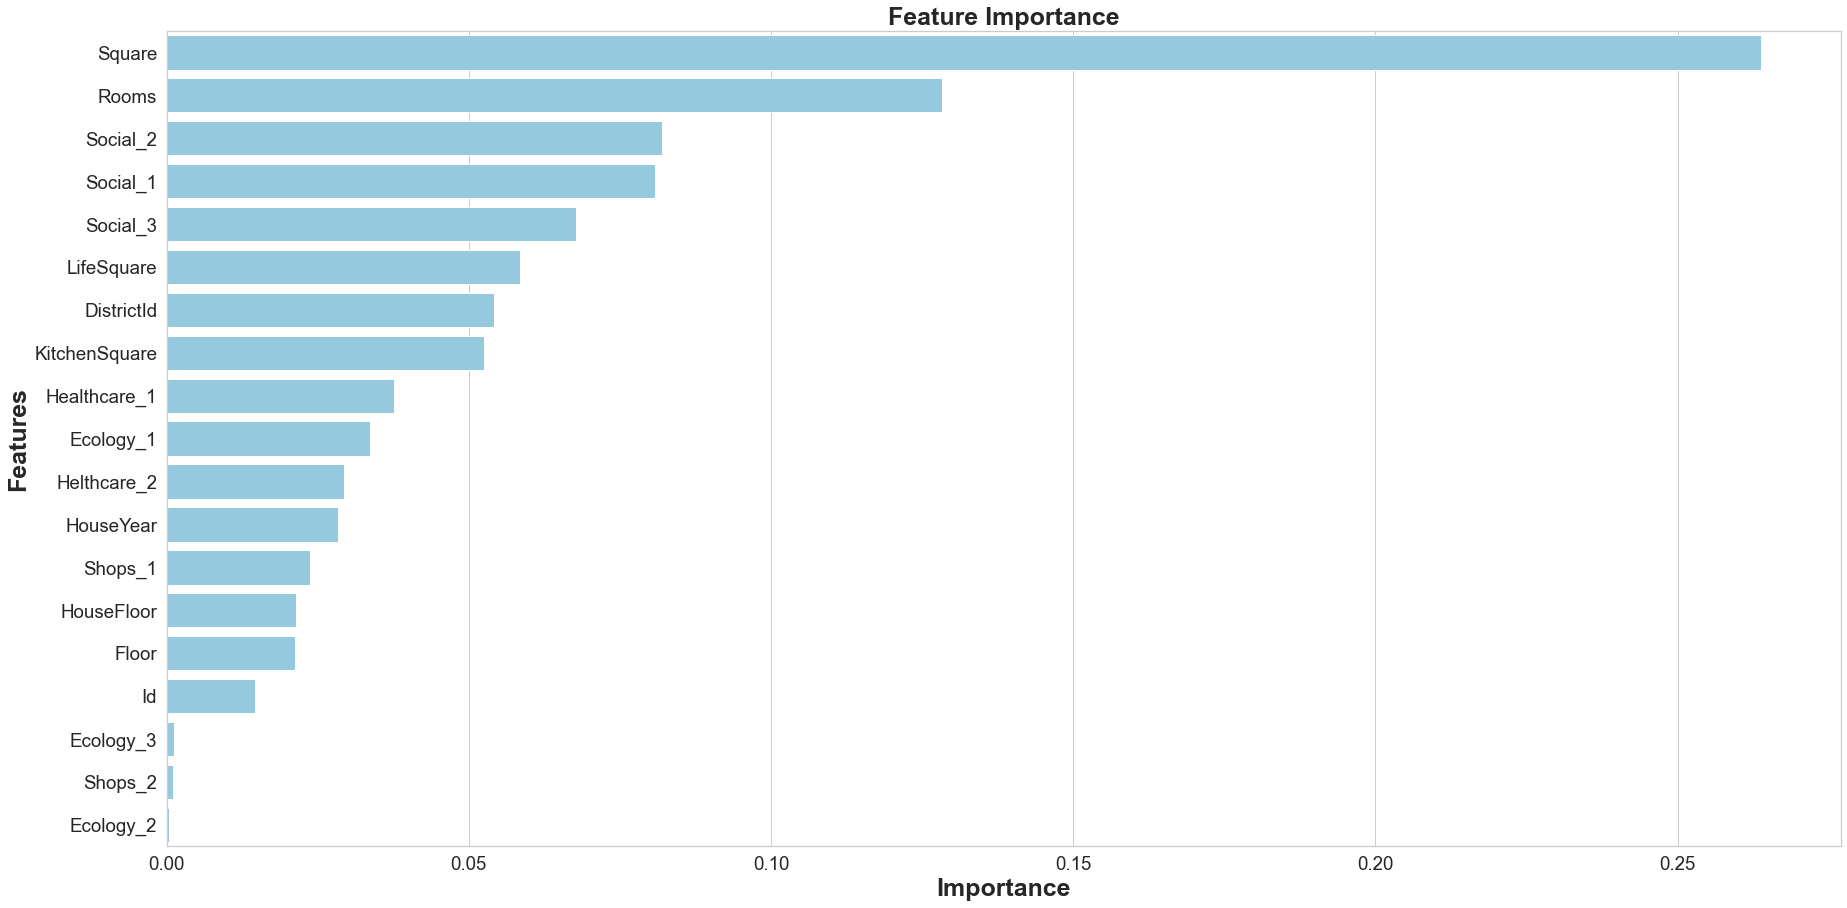

In [456]:
feats = {}
for feature, importance in zip(X.columns, model.best_estimator_.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
#display(importances)
plt.show()

In [457]:
y_pred = model.predict(X_valid)

### Оценка модели

In [458]:
r2_score(y_valid, y_pred)

0.701756580909395

# Тестовый датасет

In [459]:
test_df = pd.read_csv (r'test.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [460]:
for i in ["Ecology_2", "Ecology_3", "Shops_2"]:
    test_df[i].replace({"A": 1, "B": 0}, inplace=True)

In [461]:
imputer = IterativeImputer(imputation_order='ascending',max_iter=10,random_state=42,n_nearest_features=None)
imputed_data = imputer.fit_transform(test_df)
column_names = list(test_df.columns.values)
imputed_dataset = pd.DataFrame(imputed_data, columns = column_names)

In [462]:
predictions = model.predict(imputed_dataset)

In [463]:
output = pd.DataFrame(predictions, columns = ["Price"])
output.index.name = "Id"

In [464]:
output.to_csv('DKudrytski_predictions.csv')